# Imports

In [45]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Coleta dos Dados

In [46]:
df_activity = pd.read_csv('./Dataset/Activity.csv')
df_demog = pd.read_csv('./Dataset/Demographics.csv')
df_labels = pd.read_csv('./Dataset/Labels.csv')
df_sleep = pd.read_csv('./Dataset/Sleep.csv')
df_physiology = pd.read_csv('./Dataset/Physiology.csv')

In [47]:
for d in (df_activity, df_labels, df_sleep, df_physiology):
    d['date'] = pd.to_datetime(d['date'], errors='coerce')
    d.dropna(subset=['date'], inplace=True)

# Análise base Activity

In [48]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030559 entries, 0 to 1030558
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   patient_id     1030559 non-null  object        
 1   location_name  1030559 non-null  object        
 2   date           1030559 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 23.6+ MB


In [49]:
df_activity

,patient_id,location_name,date
0,0697d,Fridge Door,2019-06-28 13:03:29
1,0697d,Kitchen,2019-06-28 13:11:44
2,0697d,Front Door,2019-06-28 13:13:50
3,0697d,Bedroom,2019-06-28 13:13:53
4,0697d,Fridge Door,2019-06-28 13:14:09
...,...,...,...
1030554,fd100,Hallway,2019-06-30 23:48:50
1030555,fd100,Lounge,2019-06-30 23:49:40
1030556,fd100,Kitchen,2019-06-30 23:50:02
1030557,fd100,Front Door,2019-06-30 23:51:28


In [50]:
df_activity.drop_duplicates(['patient_id','date','location_name'])

,patient_id,location_name,date
0,0697d,Fridge Door,2019-06-28 13:03:29
1,0697d,Kitchen,2019-06-28 13:11:44
2,0697d,Front Door,2019-06-28 13:13:50
3,0697d,Bedroom,2019-06-28 13:13:53
4,0697d,Fridge Door,2019-06-28 13:14:09
...,...,...,...
1030554,fd100,Hallway,2019-06-30 23:48:50
1030555,fd100,Lounge,2019-06-30 23:49:40
1030556,fd100,Kitchen,2019-06-30 23:50:02
1030557,fd100,Front Door,2019-06-30 23:51:28


#### OBS: Não existem dados Duplicados nem Dados Faltantes

In [51]:
# Verificação de cobertura por paciente

cov = (df_activity.groupby('patient_id')['date']
       .agg(['min','max','nunique']).rename(columns={'nunique':'n_minutes'}))
cov

,min,max,n_minutes
patient_id,,,
0697d,2019-06-28 13:03:29,2019-06-30 23:44:25,1037
099bc,2019-05-15 12:19:32,2019-06-30 23:26:56,11898
0cda9,2019-04-15 13:22:50,2019-06-30 23:00:46,30764
0d5ef,2019-05-13 09:35:02,2019-06-30 23:08:27,19316
0efe8,2019-05-14 15:35:31,2019-06-30 22:30:38,14297
0f352,2019-06-25 13:12:10,2019-06-30 23:39:05,2464
16f4b,2019-04-01 00:05:46,2019-06-30 23:47:22,32403
1fbe4,2019-04-24 12:30:47,2019-06-30 23:17:50,29612
201d8,2019-04-18 09:48:03,2019-06-30 22:54:13,26092


In [52]:
df_activity = (df_activity
    .drop_duplicates(['patient_id','date','location_name'])  # agora de verdade
    .assign(date=lambda x: x['date'].dt.floor('min'))
    .sort_values(['patient_id','date'])
    .groupby(['patient_id','date'], as_index=False)
    .agg(location_name=('location_name','last'))
)

In [53]:
# One-hot dos cômodos
rooms = pd.get_dummies(df_activity['location_name'], prefix='room')
df_activity = pd.concat([df_activity[['patient_id','date']], rooms], axis=1)

In [54]:
df_activity

,patient_id,date,room_Back Door,room_Bathroom,room_Bedroom,room_Fridge Door,room_Front Door,room_Hallway,room_Kitchen,room_Lounge
0,0697d,2019-06-28 13:03:00,False,False,False,True,False,False,False,False
1,0697d,2019-06-28 13:11:00,False,False,False,False,False,False,True,False
2,0697d,2019-06-28 13:13:00,False,False,True,False,False,False,False,False
3,0697d,2019-06-28 13:14:00,True,False,False,False,False,False,False,False
4,0697d,2019-06-28 13:15:00,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
654248,fd100,2019-06-30 23:46:00,False,False,True,False,False,False,False,False
654249,fd100,2019-06-30 23:48:00,False,False,False,False,False,True,False,False
654250,fd100,2019-06-30 23:49:00,False,False,False,False,False,False,False,True
654251,fd100,2019-06-30 23:50:00,False,False,False,False,False,False,True,False


# Análise Label

In [55]:
df_labels['date'] = df_labels['date'].dt.floor('min')

In [56]:
df_labels

,patient_id,date,type
0,c55f8,2019-04-04 09:10:00,Blood pressure
1,16f4b,2019-04-08 13:40:00,Blood pressure
2,16f4b,2019-04-11 12:00:00,Agitation
3,ec812,2019-04-12 09:10:00,Blood pressure
4,16f4b,2019-04-14 12:00:00,Agitation
...,...,...,...
603,0697d,2019-06-29 16:50:00,Blood pressure
604,95899,2019-06-29 18:01:00,Agitation
605,28710,2019-06-30 08:00:00,Pulse
606,ab47a,2019-06-30 09:50:00,Blood pressure


# Análise Physiology

In [57]:
df_physiology['date'] = pd.to_datetime(df_physiology['date'])
df_physiology['date'] = df_physiology['date'].dt.floor('min')
df_physiology = df_physiology.sort_values('date').groupby(['patient_id', 'date']).last().reset_index()
df_physiology = df_physiology.pivot_table(
    index=['patient_id', 'date'],
    columns='device_type',
    values='value',
    aggfunc='mean'
).reset_index()

# remover o nome do eixo de colunas
df_physiology.columns.name = None

df_physiology = df_physiology.fillna(method='bfill')

C:\Users\ersantos\AppData\Local\Temp\ipykernel_17496\2286963364.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_physiology = df_physiology.fillna(method='bfill')


# Análise Sleep

In [58]:
df_sleep['date'] = pd.to_datetime(df_sleep['date'])

# Juntando as Bases

In [59]:
df = pd.merge(df_activity, df_demog, 
                    on='patient_id', 
                    how='left')

df = pd.merge(df, df_sleep, 
                    on=['patient_id', 'date'], 
                    how='left')

df = pd.merge(df, df_labels, 
                    on=['patient_id', 'date'], 
                    how='left')

df = pd.merge(df, df_physiology, 
                    on=['patient_id', 'date'], 
                    how='left')

# Tratando o DF Final

In [60]:
# One-hot das labels
labels = pd.get_dummies(df['type'], prefix='label')
df = pd.concat([df, labels], axis=1)

In [61]:
df.drop('type', axis=1, inplace=True)

In [62]:
cols_physio = [
    'Body Temperature', 'Body weight', 'Diastolic blood pressure',
    'Heart rate', 'O/E - muscle mass', 'Skin Temperature',
    'Systolic blood pressure', 'Total body water'
]

for col in cols_physio:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.sort_values(['patient_id', 'date']).reset_index(drop=True)

def fill_physio_group(g):
    for col in cols_physio:
        vals = g[col].copy()
        filled = []
        last_values = []
        for v in vals:
            if not pd.isna(v):
                last_values.append(v)
                if len(last_values) > 10:
                    last_values.pop(0)
                filled.append(v)
            else:
                filled.append(np.mean(last_values) if last_values else np.nan)
        g[col] = filled
        g[col] = g[col].fillna(method='bfill', limit=10)  
        g[col] = g[col].fillna(method='ffill', limit=10)  
    return g

df = df.groupby('patient_id', group_keys=False).apply(fill_physio_group)

for col in cols_physio:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].mean())

C:\Users\ersantos\AppData\Local\Temp\ipykernel_17496\3060363940.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  g[col] = g[col].fillna(method='bfill', limit=10)
C:\Users\ersantos\AppData\Local\Temp\ipykernel_17496\3060363940.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  g[col] = g[col].fillna(method='ffill', limit=10)
C:\Users\ersantos\AppData\Local\Temp\ipykernel_17496\3060363940.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('patient_id', group_keys=False).apply(fill_physio_group)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654262 entries, 0 to 654261
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   patient_id                654262 non-null  object        
 1   date                      654262 non-null  datetime64[ns]
 2   room_Back Door            654262 non-null  bool          
 3   room_Bathroom             654262 non-null  bool          
 4   room_Bedroom              654262 non-null  bool          
 5   room_Fridge Door          654262 non-null  bool          
 6   room_Front Door           654262 non-null  bool          
 7   room_Hallway              654262 non-null  bool          
 8   room_Kitchen              654262 non-null  bool          
 9   room_Lounge               654262 non-null  bool          
 10  age                       654262 non-null  object        
 11  sex                       654262 non-null  object        
 12  state  

# Outliers

In [64]:
variaveis = [
'Body Temperature', 
'Body weight',
'Diastolic blood pressure',
'Heart rate',
'O/E - muscle mass',
'Skin Temperature',
'Systolic blood pressure',
'Total body water'
]

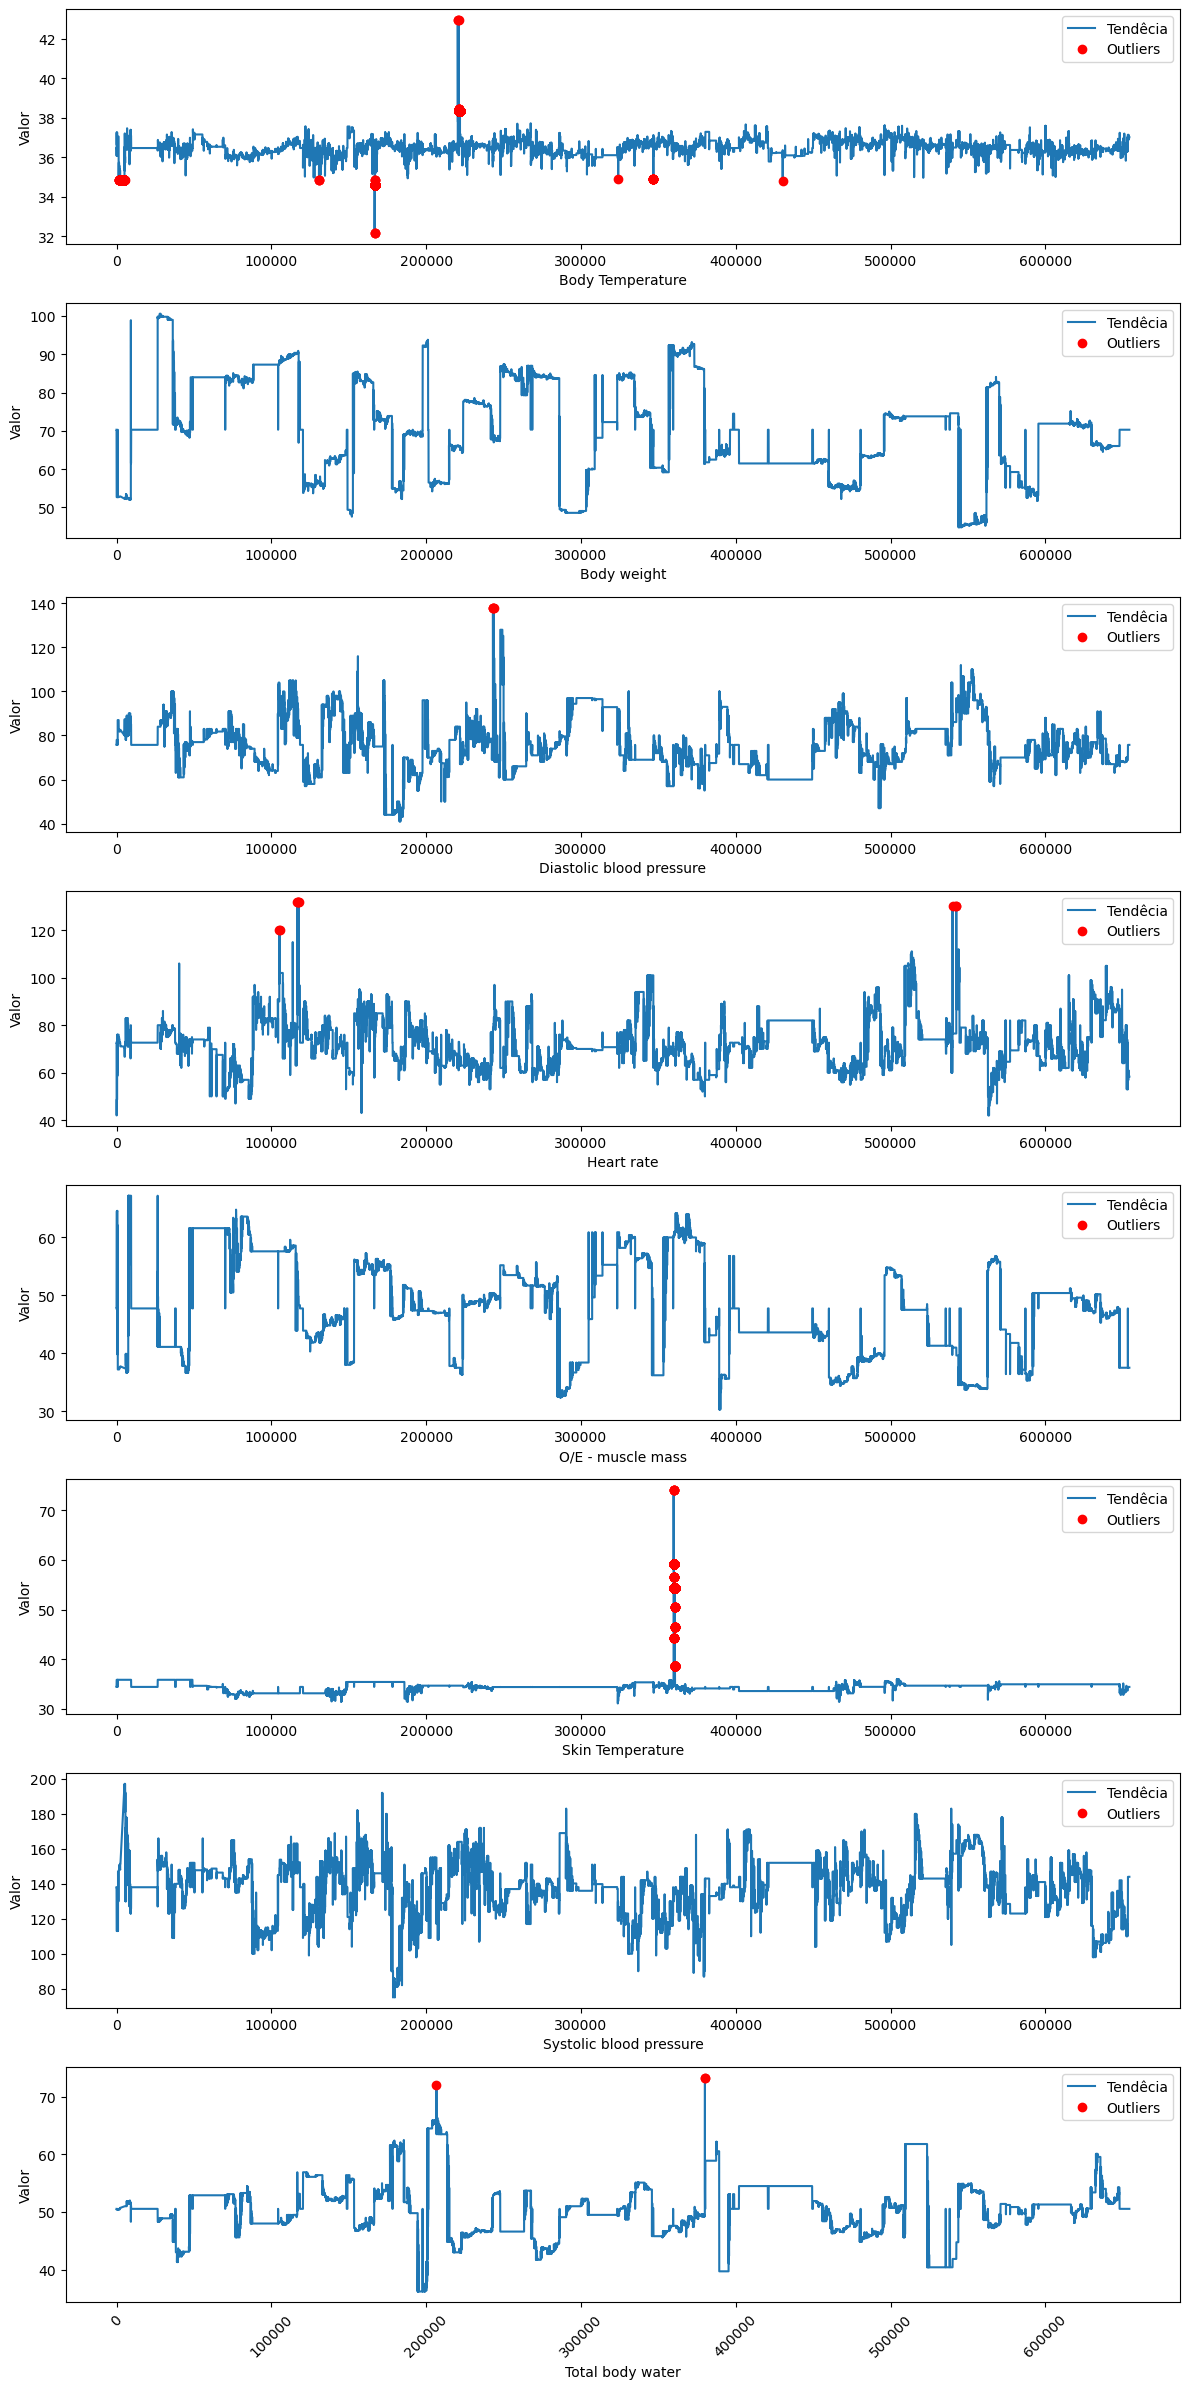

In [65]:
fig, axes = plt.subplots(nrows=len(variaveis), ncols=1, figsize=(12, len(variaveis)*3))

for i, variavel in enumerate(variaveis):
    Q1 = np.percentile(df[variavel], 25)
    Q3 = np.percentile(df[variavel], 75)
    
    C   = 3
    IIQ = Q3 - Q1
    if variavel == 'GB361P027_2.PV':
        LI  = df[variavel].min()
        LS  = df[variavel].max()
    else:
        LI  = Q1 - C*IIQ
        LS  = Q3 + C*IIQ
    
    ax = axes[i]
    ax.plot(df[variavel], label="Tendêcia")
    ax.plot(df[variavel].drop(df[~(df[variavel] < LI)].index), color='red', linestyle='', marker='o', label="Outliers")
    ax.plot(df[variavel].drop(df[~(df[variavel] > LS)].index), color='red', linestyle='', marker='o')
    ax.set_xlabel(variavel)
    ax.set_ylabel("Valor")
    plt.xticks(rotation=45)  
    ax.legend()
    df.drop(df[(df[variavel] < LI)].index, inplace= True)
    df.drop(df[(df[variavel] > LS)].index, inplace= True)

plt.tight_layout()
plt.show()